In [26]:
import tensorflow as tf

import os
import time
import random
import cv2
import numpy as np
import pandas as pd
import shutil
from glob import glob

from matplotlib import pyplot as plt
from IPython import display

In [2]:
numm = 256
RGBD_path = 'data_combined\\'# dataset path
point_path = 'point_folder\\'# point path for cross validation
GT_path = 'GT_l\\'# ground truth path

In [3]:
# define cross validation
pic = np.zeros([1,1])
def cross_validation(validnum):
    shutil.rmtree(point_path + 'train')
    shutil.rmtree(point_path + 'test')
    os.mkdir(point_path + 'train')
    os.mkdir(point_path + 'test')
    for i in range(5):
        files = glob(point_path + 'group' + str(i) + '\\*.png')
        if i == validnum:
            for file in files:
                name = list(file.split('\\'))[-1]
                cv2.imwrite(point_path + 'test\\' + name, pic)
        else:
            for file in files:
                name = list(file.split('\\'))[-1]
                cv2.imwrite(point_path + 'train\\' + name, pic)

In [4]:
# set 'validnum' here to change the data in 'train' and 'test' folder
validnum = 2
cross_validation(validnum)

In [5]:
BUFFER_SIZE = 500
BATCH_SIZE = 8
IMG_WIDTH = 256
IMG_HEIGHT = 256
# STEPS_PER_EPOCH = 512 // BATCH_SIZE

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
# Define pre-processing steps
# Enable only one of the following cells:
# Summer (Baseline)
# Summer/Winter
# Summer concat Winter
# Summer concat WinterGT
# 2Inputs Summer&Winter
# 2Inputs Summer&WinterGT

In [31]:
# UNDER CONSTRUCTION____________
# Summer (Baseline)
# @tf.function
# def load(point_file):
#     name = tf.strings.split(point_file,'\\')[-1]

#     RGBD = tf.io.read_file(RGBD_path + name)
#     GT = tf.io.read_file(GT_path + name)
#     RGBD = tf.image.decode_png(RGBD)
#     GT = tf.image.decode_png(GT)
    
#     h, w = tf.shape(RGBD)[0], tf.shape(RGBD)[1]
#     h, w = h // 2, w // 2
#     RGBD = RGBD[:h, w:, :]
#     GT = GT[:, 2:, :]
    
#     RGBD = tf.cast(RGBD, tf.float32)
#     GT = tf.cast(GT, tf.float32)

#     return RGBD, GT

# # Normalizing the images to [0, 1]
# def norm_reshape(RGBD, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     GT = tf.concat([GT2, GT1], -1)
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4]) # 这里要改

#     return RGBD, GT

# @tf.function()
# def flip_norm_reshape(RGBD, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     if tf.random.uniform(()) > 0.5:
#         # Random mirroring
#         RGBD = tf.image.flip_left_right(RGBD)
#         GT = tf.concat([GT0, GT3], -1)
#     else:
#         GT = tf.concat([GT2, GT1], -1)
        
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4])
    
#     return RGBD, GT

# def load_image_train(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = flip_norm_reshape(RGBD, GT)

#     return RGBD, GT

# def load_image_test(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = norm_reshape(RGBD, GT)

#     return RGBD, GT
# input_channel = 4

In [8]:
# Summer/Winter
# @tf.function
# def load(point_file):
#     name = tf.strings.split(point_file,'\\')[-1]

#     RGBD = tf.io.read_file(RGBD_path + name)
#     GT = tf.io.read_file(GT_path + name)
#     RGBD = tf.image.decode_png(RGBD)
#     GT = tf.image.decode_png(GT)
    
#     h, w = tf.shape(RGBD)[0], tf.shape(RGBD)[1]
#     h, w = h // 2, w // 2
#     RGBD = RGBD[:h, :, :]
# #     GT = GT[:, 2:, :]
    
#     RGBD = tf.cast(RGBD, tf.float32)
#     GT = tf.cast(GT, tf.float32)

#     return RGBD, GT

# # Normalizing the images to [0, 1]
# def norm_reshape(RGBD, GT):
#     GT = GT[:, 2:, :]
# #     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
# #     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     GT = tf.concat([GT2, GT1], -1)
#     RGBD = RGBD[:, 256:, :] / 255.
#     GT = tf.reshape(GT, [numm*4]) # 这里要改

#     return RGBD, GT

# @tf.function()
# def flip_norm_reshape(RGBD, GT):
#     if tf.random.uniform(()) > 0.5:
#         RGBD = RGBD[:, 256:, :]
#         GT = GT[:, 2:, :]
#     else:
#         RGBD = RGBD[:, :256, :]
#         GT = GT[:, :2, :]
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     if tf.random.uniform(()) > 0.5:
#             # Random mirroring
#         RGBD = tf.image.flip_left_right(RGBD)
#         GT = tf.concat([GT0, GT3], -1)
#     else:
#         GT = tf.concat([GT2, GT1], -1)
    
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4])
    
#     return RGBD, GT

# def load_image_train(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = flip_norm_reshape(RGBD, GT)

#     return RGBD, GT

# def load_image_test(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = norm_reshape(RGBD, GT)

#     return RGBD, GT
# input_channel = 4

In [43]:
# Summer concat Winter
# @tf.function
# def load(point_file):
#     name = tf.strings.split(point_file,'\\')[-1]

#     RGBD = tf.io.read_file(RGBD_path + name)
#     GT = tf.io.read_file(GT_path + name)
#     RGBD = tf.image.decode_png(RGBD)
#     GT = tf.image.decode_png(GT)
    
#     h, w = tf.shape(RGBD)[0], tf.shape(RGBD)[1]
#     h, w = h // 2, w // 2
#     RGBD_s = RGBD[:h, w:, :]
#     RGBD_w = RGBD[:h, :w, :]
#     RGBD = tf.concat([RGBD_s, RGBD_w], -1)
#     GT = GT[:, 2:, :]
    
#     RGBD = tf.cast(RGBD, tf.float32)
#     GT = tf.cast(GT, tf.float32)

#     return RGBD, GT

# # Normalizing the images to [0, 1]
# def norm_reshape(RGBD, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     GT = tf.concat([GT2, GT1], -1)
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4]) # 这里要改

#     return RGBD, GT

# @tf.function()
# def flip_norm_reshape(RGBD, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     if tf.random.uniform(()) > 0.5:
#         # Random mirroring
#         RGBD = tf.image.flip_left_right(RGBD)
#         GT = tf.concat([GT0, GT3], -1)
#     else:
#         GT = tf.concat([GT2, GT1], -1)
        
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4])
    
#     return RGBD, GT

# def load_image_train(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = flip_norm_reshape(RGBD, GT)

#     return RGBD, GT

# def load_image_test(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = norm_reshape(RGBD, GT)

#     return RGBD, GT
# input_channel = 8

In [60]:
# Summer concat WinterGT
# @tf.function
# def load(point_file):
#     name = tf.strings.split(point_file,'\\')[-1]

#     image = tf.io.read_file(RGBD_path + name)
#     GT = tf.io.read_file(GT_path + name)
#     image = tf.image.decode_png(image)
#     GT = tf.image.decode_png(GT)
    
#     h, w = tf.shape(image)[0], tf.shape(image)[1]
#     h, w = h // 2, w // 2
#     RGBD = image[:h, w:, :]
#     refer = image[h:, :w, 0]
    
#     GT = GT[:, 2:, :]
    
#     refer = tf.reshape(refer, [h, w, 1])
#     RGBD = tf.cast(RGBD, tf.float32)
#     refer = tf.cast(refer, tf.float32)#[:,:,0]
#     GT = tf.cast(GT, tf.float32)
#     RGBD = tf.concat([RGBD, refer], -1)

#     return RGBD, GT

# # Normalizing the images to [0, 1]
# def norm_reshape(RGBD, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     GT = tf.concat([GT2, GT1], -1)
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4]) # 这里要改

#     return RGBD, GT

# @tf.function()
# def flip_norm_reshape(RGBD, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     if tf.random.uniform(()) > 0.5:
#      # Random mirroring
#         RGBD = tf.image.flip_left_right(RGBD)
#         GT = tf.concat([GT0, GT3], -1)
#     else:
#         GT = tf.concat([GT2, GT1], -1)
        
#     RGBD = RGBD / 255.
#     GT = tf.reshape(GT, [numm*4])
    
#     return RGBD, GT

# def load_image_train(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = flip_norm_reshape(RGBD, GT)

#     return RGBD, GT

# def load_image_test(point_file):
#     RGBD, GT = load(point_file)
#     RGBD, GT = norm_reshape(RGBD, GT)

#     return RGBD, GT
# input_channel = 5

In [64]:
# 2Inputs Summer&Winter

# def load(point_file):
#     name = tf.strings.split(point_file,'\\')[-1]

#     image = tf.io.read_file(RGBD_path + name)
#     GT = tf.io.read_file(GT_path + name)
#     image = tf.image.decode_png(image)
#     GT = tf.image.decode_png(GT)
    
#     h, w = tf.shape(image)[0], tf.shape(image)[1]
#     h, w = h // 2, w // 2
#     RGBD = image[:h, w:, :]
#     refer = image[:h, :w, :]

#     GT = GT[:, 2:, :]
# #     refer = tf.reshape(refer, [h, w, 1])
    
#     RGBD = tf.cast(RGBD, tf.float32)
#     refer = tf.cast(refer, tf.float32)#[:,:,0]
#     GT = tf.cast(GT, tf.float32)
    
#     return RGBD, refer, GT

# # Normalizing the images to [0, 1]
# def norm_reshape(RGBD, refer, GT):
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT = tf.concat([GT2, GT1], -1)
    
#     RGBD = RGBD / 255.
#     refer = refer // 255
#     GT = tf.reshape(GT, [numm*4])

#     return RGBD, refer, GT

# @tf.function()
# def flip_norm_reshape(RGBD, refer, GT):
#     GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
#     GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
#     GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
#     GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
#     if tf.random.uniform(()) > 0.5:
#         # Random mirroring
#         RGBD = tf.image.flip_left_right(RGBD)
#         refer = tf.image.flip_left_right(refer)
#         GT = tf.concat([GT0, GT3], -1)
#     else:
#         GT = tf.concat([GT2, GT1], -1)
        
#     RGBD = RGBD / 255.
#     refer = refer // 255
#     GT = tf.reshape(GT, [numm*4])
    
#     return RGBD, refer, GT

# def load_image_train(point_file):
#     RGBD, refer, GT = load(point_file)
#     RGBD, refer, GT = flip_norm_reshape(RGBD, refer, GT)

#     return {'input_3': RGBD, 'input_4': refer}, GT

# def load_image_test(point_file):
#     RGBD, refer, GT = load(point_file)
#     RGBD, refer, GT = norm_reshape(RGBD, refer, GT)

#     return {'input_3': RGBD, 'input_4': refer}, GT
# refer_channel = 4

In [67]:
# 2Inputs Summer&WinterGT

def load(point_file):
    name = tf.strings.split(point_file,'\\')[-1]

    image = tf.io.read_file(RGBD_path + name)
    GT = tf.io.read_file(GT_path + name)
    image = tf.image.decode_png(image)
    GT = tf.image.decode_png(GT)
    
    h, w = tf.shape(image)[0], tf.shape(image)[1]
    h, w = h // 2, w // 2
    RGBD = image[:h, w:, :]
    refer = image[h:, :w, 0]

    GT = GT[:, 2:, :]
    refer = tf.reshape(refer, [h, w, 1])
    
    RGBD = tf.cast(RGBD, tf.float32)
    refer = tf.cast(refer, tf.float32)#[:,:,0]
    GT = tf.cast(GT, tf.float32)
    
    return RGBD, refer, GT

# Normalizing the images to [0, 1]
def norm_reshape(RGBD, refer, GT):
    GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
    GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
    GT = tf.concat([GT2, GT1], -1)
    
    RGBD = RGBD / 255.
    refer = refer // 255
    GT = tf.reshape(GT, [numm*4])

    return RGBD, refer, GT

@tf.function()
def flip_norm_reshape(RGBD, refer, GT):
    GT0 = tf.reshape(GT[:, :, 0], [256, 2, 1])
    GT1 = tf.reshape(GT[:, :, 1], [256, 2, 1])
    GT2 = tf.reshape(GT[:, :, 2], [256, 2, 1])
    GT3 = tf.reshape(GT[:, :, 3], [256, 2, 1])
    if tf.random.uniform(()) > 0.5:
        # Random mirroring
        RGBD = tf.image.flip_left_right(RGBD)
        refer = tf.image.flip_left_right(refer)
        GT = tf.concat([GT0, GT3], -1)
    else:
        GT = tf.concat([GT2, GT1], -1)
        
    RGBD = RGBD / 255.
    refer = refer // 255
    GT = tf.reshape(GT, [numm*4])
    
    return RGBD, refer, GT

def load_image_train(point_file):
    RGBD, refer, GT = load(point_file)
    RGBD, refer, GT = flip_norm_reshape(RGBD, refer, GT)

    return {'input_3': RGBD, 'input_4': refer}, GT

def load_image_test(point_file):
    RGBD, refer, GT = load(point_file)
    RGBD, refer, GT = norm_reshape(RGBD, refer, GT)

    return {'input_3': RGBD, 'input_4': refer}, GT
refer_channel = 1

In [10]:
train = tf.data.Dataset.list_files(point_path+'train\\*.png')
train = train.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)#.repeat()

In [11]:
test = tf.data.Dataset.list_files(point_path+'test\\*.png')
test = test.map(load_image_test)
test_dataset = test.batch(BATCH_SIZE)

In [13]:
output_channel = numm * 4

In [14]:
base_model = tf.keras.applications.EfficientNetB4(input_shape=[256, 256, 4], include_top=False, weights=None)#这里要改

C:\Users\61452\anaconda3\envs\tf-gpu\lib\site-packages\keras\applications\imagenet_utils.py:331: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  warnings.warn('This model usually expects 1 or 3 input channels. '


In [15]:
ptm = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)
# ptm.summary()

In [16]:
# Fully Connection
def IEF():
    inputs = tf.keras.layers.Input(shape=[256,256,input_channel])
    x = ptm(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(2048, activation='relu')(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dense(output_channel)(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [17]:
model = IEF()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 4)]     0         
_________________________________________________________________
model (Functional)           (None, 8, 8, 1792)        17674257  
_________________________________________________________________
flatten (Flatten)            (None, 114688)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              234883072 
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
Total params: 255,705,105
Trainable params: 255,579,896
Non-trainable params: 125,209
_______________________________________

In [30]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.MeanSquaredError())

In [31]:
checkpoint_filepath = 'weights_checkpoints/2_0'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [32]:
EPOCHS = 400
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=test_dataset,
                          callbacks=[model_checkpoint_callback])

Epoch 1/400
102/102 [==============================] - 37s 217ms/step - loss: 2049.8262 - val_loss: 2095.3948
Epoch 2/400
102/102 [==============================] - 20s 185ms/step - loss: 384.5825 - val_loss: 697.3754
Epoch 3/400
102/102 [==============================] - 20s 186ms/step - loss: 391.5413 - val_loss: 423.7242
Epoch 4/400
102/102 [==============================] - 20s 184ms/step - loss: 351.4303 - val_loss: 577.7222
Epoch 5/400
102/102 [==============================] - 19s 183ms/step - loss: 349.1156 - val_loss: 390.4374
Epoch 6/400
102/102 [==============================] - 19s 183ms/step - loss: 309.9026 - val_loss: 277.7155
Epoch 7/400
102/102 [==============================] - 19s 185ms/step - loss: 230.1657 - val_loss: 236.5085
Epoch 8/400
102/102 [==============================] - 19s 184ms/step - loss: 211.7811 - val_loss: 266.3816
Epoch 9/400
102/102 [==============================] - 19s 184ms/step - loss: 171.3237 - val_loss: 198.9168
Epoch 10/400
102/102 [====

102/102 [==============================] - 19s 186ms/step - loss: 19.2139 - val_loss: 44.3586
Epoch 154/400
102/102 [==============================] - 19s 187ms/step - loss: 17.4137 - val_loss: 42.9546
Epoch 155/400
102/102 [==============================] - 19s 186ms/step - loss: 17.8206 - val_loss: 45.3711
Epoch 156/400
102/102 [==============================] - 19s 185ms/step - loss: 17.5655 - val_loss: 49.1950
Epoch 157/400
102/102 [==============================] - 19s 186ms/step - loss: 15.9415 - val_loss: 52.2518
Epoch 158/400
102/102 [==============================] - 19s 185ms/step - loss: 17.4450 - val_loss: 50.0950
Epoch 159/400
102/102 [==============================] - 19s 185ms/step - loss: 14.7536 - val_loss: 45.5439
Epoch 160/400
102/102 [==============================] - 19s 186ms/step - loss: 14.0393 - val_loss: 40.7404
Epoch 161/400
102/102 [==============================] - 20s 186ms/step - loss: 15.7217 - val_loss: 44.1891
Epoch 162/400
102/102 [===================

Epoch 229/400
102/102 [==============================] - 19s 186ms/step - loss: 10.0980 - val_loss: 42.1056
Epoch 230/400
102/102 [==============================] - 19s 186ms/step - loss: 10.6806 - val_loss: 47.6447
Epoch 231/400
102/102 [==============================] - 19s 186ms/step - loss: 12.2510 - val_loss: 47.5626
Epoch 232/400
102/102 [==============================] - 19s 186ms/step - loss: 10.3077 - val_loss: 40.4709
Epoch 233/400
102/102 [==============================] - 19s 186ms/step - loss: 10.4218 - val_loss: 43.3401
Epoch 234/400
102/102 [==============================] - 19s 185ms/step - loss: 10.8547 - val_loss: 39.8547
Epoch 235/400
102/102 [==============================] - 19s 186ms/step - loss: 10.8025 - val_loss: 47.8203
Epoch 236/400
102/102 [==============================] - 19s 186ms/step - loss: 10.4357 - val_loss: 38.6849
Epoch 237/400
102/102 [==============================] - 19s 185ms/step - loss: 9.6494 - val_loss: 40.9795
Epoch 238/400
102/102 [======

102/102 [==============================] - 19s 187ms/step - loss: 6.1229 - val_loss: 36.4271
Epoch 382/400
102/102 [==============================] - 19s 186ms/step - loss: 6.1860 - val_loss: 38.0491
Epoch 383/400
102/102 [==============================] - 19s 185ms/step - loss: 6.3413 - val_loss: 40.2972
Epoch 384/400
102/102 [==============================] - 19s 186ms/step - loss: 13.9947 - val_loss: 75.2623
Epoch 385/400
102/102 [==============================] - 19s 186ms/step - loss: 13.1455 - val_loss: 48.9604
Epoch 386/400
102/102 [==============================] - 19s 185ms/step - loss: 10.8660 - val_loss: 49.7233
Epoch 387/400
102/102 [==============================] - 19s 187ms/step - loss: 14.5703 - val_loss: 44.5939
Epoch 388/400
102/102 [==============================] - 19s 186ms/step - loss: 9.4001 - val_loss: 42.8425
Epoch 389/400
102/102 [==============================] - 19s 186ms/step - loss: 8.1451 - val_loss: 38.2833
Epoch 390/400
102/102 [========================

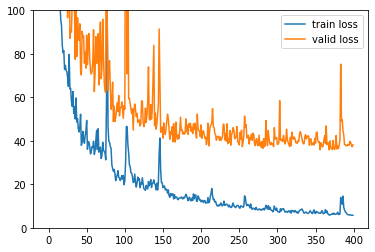

In [33]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='valid loss')
plt.legend()
plt.ylim(0, 100) 
plt.show()

In [34]:
model.load_weights(checkpoint_filepath)

In [36]:
# Enable this prediction cell for:
# Summer (Baseline)
# Summer/Winter
# Summer concat Winter
# Summer concat WinterGT
# def save_predictions():
#     files = glob('point_folder\\test\\' + '*.png')
#     for file in files:
#         name = list(file.split('\\'))[-1]
#         img = np.zeros([256,256])
#         picture, _ = load_image_test(file)
#         input_pic = np.reshape(picture, (1,256,256,input_channel))
#         prediction = model.predict(input_pic)
#         prediction = np.array(prediction).astype(int).reshape(256,2,2)
#         for i in range(256):
#             cv2.line(img, (prediction[i,0,0],i), (prediction[i,0,1],i), 255, 1)
#             cv2.line(img, (prediction[i,1,0],i), (prediction[i,1,1],i), 255, 1)

#         cv2.imwrite('prediction_HOB_w&s\\' + name, img)# change save path here

In [36]:
# Enable this prediction cell for:
# 2Inputs Summer&Winter
# 2Inputs Summer&WinterGT
def save_predictions():
    files = glob('point_folder\\test\\' + '*.png')
    for file in files:
        name = list(file.split('\\'))[-1]
        img = np.zeros([256,256])
        picture, _ = load_image_test(file)
        input_pic, refer = list(picture.values())[0], list(picture.values())[1]
        input_pic = np.reshape(input_pic, (1,256,256,4))
        refer = np.reshape(refer, (1,256,256,refer_channel))
        prediction = model.predict([input_pic, refer])
        prediction = np.array(prediction).astype(int).reshape(256,2,2)
        for i in range(256):
            cv2.line(img, (prediction[i,0,0],i), (prediction[i,0,1],i), 255, 1)
            cv2.line(img, (prediction[i,1,0],i), (prediction[i,1,1],i), 255, 1)

        cv2.imwrite('prediction_HOB_GTpic2\\' + name, img)# change save path here

In [37]:
# start = time.time()
# save_predictions()
# end = time.time()
# print(end - start)
save_predictions()